# NumPy Tutorial

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/200px-NumPy_logo_2020.svg.png" alt="NumPy"/>

<table align="left">
    <tr>
    <td><a href="https://colab.research.google.com/github/airnandez/numpandas/blob/master/notebooks/NumPy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a></td>
    <td><a href="https://mybinder.org/v2/gh/airnandez/numpandas/master?filepath=notebooks%2FNumPy.ipynb">
  <img src="https://mybinder.org/badge_logo.svg" alt="Launch Binder"/>
</a></td>
  </tr>
</table>

*Author: Fabio Hernandez*

*Last updated: 2025-02-26*

*Location:* https://github.com/airnandez/numpandas

--------------------
## Introduction

This is a short tutorial for helping you getting familiar with the NumPy library. NumPy is written in C and Python and has its origins back in 2005. It is at the heart of several scientific libraries of the Python ecosystem, such as Pandas, SciPy, etc.

This tutorial draws inspiration, ideas and sometimes material from several publicly available sources. Please see the [Acknowledgements](#Acknowledgements) section for more details and to deep further on that material.

--------------------
## Reference documentation

The entry point to get the NumPy documentation is [www.numpy.org](https://www.numpy.org) which includes a [user guide](https://numpy.org/doc/stable/user/index.html) and a [reference manual](https://numpy.org/doc/stable/reference/index.html). Although not strictly required, you are encouraged to open the reference documentation alongside this notebook to follow along.

The [DataCamp NumPy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf) can be also a useful quick reference.

--------------------
## Import

It is customarily to import numpy this way:

In [1]:
import numpy as np
np.__version__

'1.26.4'

--------------------
## NumPy's raison d'être

NumPy was developed to execute operations on arrays of data (numbers, strings, etc.) significantly faster than, for instance, by using [Python built-in lists](https://docs.python.org/3/tutorial/datastructures.html). Although NumPy *arrays* have some limitations compared to Python lists in terms of versatility, when it comes to numerical operations NumPy arrays are much faster. NumPy organizes its data in memory so to use the built-in capabilities of modern CPUs to apply a single operation to multiple data ([SIMD](https://en.wikipedia.org/wiki/Single_instruction,_multiple_data)). More details are available in [NumPy documentation](https://numpy.org/doc/stable/reference/simd/index.html). See also [An introduction to vectorization](https://blog.cr.yp.to/20190430-vectorize.html) by D. J. Bernstein.

Let's create an array of 1M integers and measure the time to square each of them using Python built-in types:

In [2]:
data = list(range(1_000_000))

In [3]:
%timeit data_squarred = [x**2 for x in data]

33.2 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


And now, let's perform the same operation but this time we will use a [NumPy array](https://numpy.org/doc/stable/reference/arrays.html) (we will see later in more detail how to create arrays):

In [4]:
npydata = np.arange(1_000_000)

In [5]:
%timeit npydata**2

654 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The actual number you get depends on the hardware you are using: in this case, we can see that using a NumPy array is several hundred times faster than using Python built-in lists. This difference holds also for Python built-in functions. Let's try the built-in function [sum()](https://docs.python.org/3/library/functions.html#sum) which sums all the elements of the list `data` passed as argument:

In [6]:
%timeit sum(data)

2.68 ms ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


and compare the result above against [NumPy's sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) to sum all the values of the Numpy array `npydata`:

In [7]:
%timeit np.sum(npydata)

164 µs ± 631 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


--------------------
## Array creation

### create a `numpy.array` from Python lists

We can create a [NumPy array](https://numpy.org/doc/stable/reference/arrays.html) from an existing Python list. A NumPy array is a N-dimensional data structure that contains a collection of items of the same type. All the items contained in a NumPy array are homogeneous (e.g., they are all integers or all floats).

In [8]:
# Create a Python list of a few integers
l = [10, 20, 30, 40, 50]

# Create a 1D NumPy array from the contents of a Python list
a = np.array(l)
a

array([10, 20, 30, 40, 50])

Note that the Python list and the resulting NumPy array are two independent objects. Modifying the contents of one of them does not affect the other:

In [9]:
# Modifying the list does not modify the existing NumPy array
l[0] = 1
print(l)

[1, 20, 30, 40, 50]


In [10]:
print(a)

[10 20 30 40 50]


The type of the array returned by `np.array()` is `numpy.ndarray`:

In [11]:
type(a)

numpy.ndarray

**All the elements in a NumPy array are of the same type**. In the example above, they are all integers. We can make explicit the type we want each element of the array to be by specifying the `dtype` argument:

In [13]:
np.array([10, 20, 30, 40, 50], dtype='float32')

array([10., 20., 30., 40., 50.], dtype=float32)

### create a `numpy.array` from scratch

NumPy provides several functions for efficiently creating arrays of 1, 2 or N dimensions. Here are some of them.

In [14]:
# Create an array with 6 elements, each element is of type 'int' and has the value zero
np.zeros(6, dtype='int')

array([0, 0, 0, 0, 0, 0])

In [15]:
# Create an array with 6 elements with all the values set to one
np.ones(6, dtype='int')

array([1, 1, 1, 1, 1, 1])

In [16]:
# Create an array with 10 elements, each having the value 145.0 (float)
np.full(10, 145.0)

array([145., 145., 145., 145., 145., 145., 145., 145., 145., 145.])

The same functions above can be used for creating 2-dimensional arrays, or matrices. For intance for creating the $3 \times 4$ matrix:

$$
M_{3 \times 4} =
\begin{bmatrix}
0 & 0 & 0 & 0 \\[0.3em]
0 & 0 & 0 & 0 \\[0.3em]
0 & 0 & 0 & 0 \\[0.3em]
\end{bmatrix}
$$

we can use:

In [17]:
np.zeros(shape=(3,4), dtype='float')

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

The argument `shape` specifies the desired shape of the array as tuple, in terms of `(rows, columns)`. Although it is not necessary to specify the name of the `shape` argument, in some cases it is useful for clarity:

In [18]:
# Create a 3x4 matrix where each element has the value π
np.full((3,4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

In [19]:
# Create an array filled with a sequence of numbers in the interval [10, 100)
# The function numpy.arange() works in a similar way as the Python built-in range() function
np.arange(start=10, stop=100, step=5)

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])

In [20]:
# Create an array of 5 evenly-spaced values in interval [1, 10] 
np.linspace(start=0, stop=10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

Create an identity matrix $I_{3 \times 3}$:

$$
I_{3 \times 3} =
\begin{bmatrix}
1 & 0 & 0 \\[0.3em]
0 & 1 & 0 \\[0.3em]
0 & 0 & 1 \\[0.3em]
\end{bmatrix}
$$


In [21]:
# Create an identity matrix of size 3 x 3
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
# Create a 3x4 matrix of random integers in the interval [0, 20)
np.random.randint(low=0, high=20, size=(3,4))

array([[15,  4,  8,  8],
       [ 2,  1, 15, 11],
       [ 4,  5, 10, 10]])

In [23]:
# Create a 3x4 matrix of random values drawn from a normal (Gaussian) distribution
# with µ=0, and σ=1
np.random.normal(0, 1, size=(3,4))

array([[-0.52441992,  0.01043866,  1.19722251, -0.88481842],
       [-1.09432065,  0.11767372,  0.74962641, -1.18845877],
       [ 0.80443789, -1.68822246,  0.4071792 ,  1.0893931 ]])

## Array data types

You can create NumPy arrays and specify the type of its elements. In the examples above we created 1D and 2D arrays which elements are of type `int` or `float`, but there are several more types you could use such as `bool`, `str`, `int`, `float`, `complex`.

The specific type you use determines both the _range of values_ that can be represented and the _number of bytes in memory_ necessary for storing each value. For instance, a value of type `numpy.int32` takes 32 bits (i.e. 4 bytes of memory) and can represent values in the interval [-2147483648, 2147483647].

NumPy provides several [integer types](https://numpy.org/doc/stable/reference/arrays.scalars.html#built-in-scalar-types) (e.g. `int8`, `int16`, `int32`, `int64`, `uint8`, `uint16`, ...), several [floating point types](https://numpy.org/doc/stable/reference/arrays.scalars.html#floating-point-types) (e.g. `float16`, `float32`, `float64`) and several [complex types](https://numpy.org/doc/stable/reference/arrays.scalars.html#complex-floating-point-types) (e.g. `complex64`, `complex128`). You can use types `np.int` and `np.float` to refer to the types of the native integer values and floating point values of the CPU of the computer you are using.

In addition, for some of those types you can specify the internal representation that you would like, such as [little endian or big endian](https://en.wikipedia.org/wiki/Endianness). More detailed information can be found in the [dtype documentaion](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

You can retrieve information about the interval range of an integer type by using [numpy.iinfo()](https://www.numpy.org/devdocs/reference/generated/numpy.iinfo.html?highlight=iinfo#numpy.iinfo) and for floating point values by using [numpy.finfo()](https://www.numpy.org/devdocs/reference/generated/numpy.finfo.html#numpy.finfo).

In [26]:
# Get the range of values that can be represented by a variable of type int32
np.iinfo(np.int32)

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [27]:
# Get the range of values that can be represented by a variable of type float32
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [28]:
# Show the native integer and floating point types for this computer's CPU
np.dtype('int'), np.dtype('float')

(dtype('int64'), dtype('float64'))

## Array attributes

NumPy exposes attributes of arrays such as the number of dimensions, the total size (i.e. the total number of elements), the array shape (i.e. the number of elements on each dimension) and the amount of memory used for storing each element and all of its elements (see [documentation](https://numpy.org/doc/stable/reference/arrays.ndarray.html#array-attributes)).

In [29]:
# Generate a matrix of size 3x4 with random values in
# the interval [0, 10)
a = np.random.randint(10, size=(3,4))
print(a, a.dtype)

[[2 3 3 7]
 [8 4 2 5]
 [6 7 8 5]] int64


In [30]:
# Number of dimensions
print('a.ndim =', a.ndim)

# Number of elements in the array
print('a.size =', a.size)

# Number of elements on each dimension
print('a.shape =', a.shape)

a.ndim = 2
a.size = 12
a.shape = (3, 4)


In [31]:
# Amount of memory (in bytes) for storing each item
print('a.itemsize =', a.itemsize)

# Total amount of memory (in bytes) of the array
print('a.nbytes =', a.nbytes)

a.itemsize = 8
a.nbytes = 96


In [32]:
# The total amount of memory is the result of multiplying the
# number of bytes per item times the number of items
a.itemsize * a.size

96

## Array indexing

In [33]:
# Set the seed of the random number generator to a known value, for reproducibility of
# the examples
np.random.seed(0)

In [34]:
# Create a 1D array with 5 values in interval [0, 100)
a1 = np.random.randint(100, size=5)
a1

array([44, 47, 64, 67, 67])

The syntax for selecting a single element of a NumPy array is analogous to the syntax for selecting elements of a Python built-in list. The index of the first element of the array is 0 (zero):

In [35]:
# The element at position 0 (i.e. the first element)
a1[0]

44

In [36]:
# The element at position 4
a1[4]

67

Using negative indices (e.g -1, -2, ...) allows for retrieving the elements of the array relative to the end of the array:

In [37]:
a1

array([44, 47, 64, 67, 67])

In [38]:
# Retrieve the last element of the array
a1[-1]

67

In [39]:
# Retrieve the second to last element of the array
a1[-2]

67

In the case of a multi-dimensional array, for accessing a single element we need to specify the index on each dimension:

In [40]:
# 2D array
a2 = np.random.randint(100, size=(3,4))
a2

array([[ 9, 83, 21, 36],
       [87, 70, 88, 88],
       [12, 58, 65, 39]])

In [41]:
# row 1, column 3
a2[1, 3]

88

Use the same notation to modify one element of an array:

In [42]:
a1

array([44, 47, 64, 67, 67])

In [43]:
a1[3] *= 10
a1

array([ 44,  47,  64, 670,  67])

In [44]:
a2

array([[ 9, 83, 21, 36],
       [87, 70, 88, 88],
       [12, 58, 65, 39]])

In [45]:
# Set the element at position (row 1, column 0) to the value 100
a2[1, 0] = 100

In [46]:
a2

array([[  9,  83,  21,  36],
       [100,  70,  88,  88],
       [ 12,  58,  65,  39]])

If you assign a floating point value to an array of integers, the floating point value is silently truncated to convert it to integer:

In [47]:
# The type of each element of the array 'a1' is 'int64'
a1, a1.dtype

(array([ 44,  47,  64, 670,  67]), dtype('int64'))

In [48]:
# Any floating point value is converted to the receiving type
# ('int64' in this case)
a1[0] = np.pi  # truncated to 3
a1

array([  3,  47,  64, 670,  67])

## Accessing subarrays (slices)

In Python, the syntax for accessing elements of a list is of the form:

`a[start:stop:step]`

NumPy provides the same syntax for slicing arrays:

In [49]:
a1 = np.arange(10)
a1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
# Retrieve the elements of the array at indices [0,3)
a1[0:3]

array([0, 1, 2])

In [51]:
# Retrieve the elements of the array from index 0 up to
# index 8 (not included), by steps of 2
a1[0:8:2]

array([0, 2, 4, 6])

When the `start` value is ommitted, the slice starts from the begining of the array. Similarly, if `stop` is omitted, the slice goes up to the end of the array:

In [52]:
# From the beginning up to the end of the array, by steps of 3
a1[::3]

array([0, 3, 6, 9])

You can also slice multi-dimensional arrays, by specifying the slice for each dimension:

In [53]:
# Create a matrix of dimensions 3 x 4
a2 = np.arange(start=0, stop=12).reshape(3,4)
a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [54]:
# Get the first 2 rows (i.e. rows 0 and 1) and the first 3 columns (i.e. columns 0, 1 and 2)
a2[:2, :3]

array([[0, 1, 2],
       [4, 5, 6]])

In [55]:
# Get all the rows, from columns 1 and 2
a2[:, 1:3]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [56]:
# Get a 1D array with the elements in row number 2 (a shorter albeit less clear way to express this would be a2[2])
a2[2, :]

array([ 8,  9, 10, 11])

In [57]:
# Get a 1D array with the elements in column number 3
a2[:, 3]

array([ 3,  7, 11])

### Subarrays are views, not copies

The array returned as a result of a slice operation is a **view** of the original array, as opposed to a **copy**. This means that **modifications you make to the slice also affect the original array**:

In [59]:
a2 = np.arange(start=0, stop=12).reshape(3,4)
a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [60]:
# Get a subarray: all the rows, columns 1 and 2
view = a2[:, 1:3]
view

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [61]:
# Modifying the view also modifies the original array
view[0, 1] = 1000_000
view

array([[      1, 1000000],
       [      5,       6],
       [      9,      10]])

In [ ]:
a2

Sometimes, it is necessary to make a copy the subarray to protect the original array from modifications. This can be done with the [copy()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.copy.html) method:

In [62]:
# Copy a subarray of a2 into c
c = a2[:, 1:3].copy()
c

array([[      1, 1000000],
       [      5,       6],
       [      9,      10]])

In [63]:
# You can modify the copy and the original array is left intact
c[0, 0] = -50_000
c

array([[ -50000, 1000000],
       [      5,       6],
       [      9,      10]])

In [64]:
a2

array([[      0,       1, 1000000,       3],
       [      4,       5,       6,       7],
       [      8,       9,      10,      11]])

## Array concatenation

It is possible to concatenate several NumPy arrays using [numpy.concatenate()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html). The result of the concatenation operation depends on the dimensions of the arrays involved in the operation.


### Concatenating 1D arrays

In [65]:
# Concatenate several 1D arrays of possibly different sizes
a = np.array([1, 2, 3])
b = np.array([4, 5, 6, 7])
c = np.array([7, 8, 9, 10, 11])

np.concatenate([a, b, c])

array([ 1,  2,  3,  4,  5,  6,  7,  7,  8,  9, 10, 11])

### Concatenating 2D arrays

In [66]:
a2 = np.arange(6).reshape(3,2)
a2

array([[0, 1],
       [2, 3],
       [4, 5]])

In [67]:
# Vertically concatenate two matrices by increasing the number of rows
np.concatenate([a2, a2])

array([[0, 1],
       [2, 3],
       [4, 5],
       [0, 1],
       [2, 3],
       [4, 5]])

In [68]:
# Horizontally concatenate two matrices by increasing the number of columns.
# Note the 'axis' argument to instruct 'concatenate' how to operate.
np.concatenate([a2, a2], axis=1)

array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [4, 5, 4, 5]])

It is also possible to concatenate arrays of different dimensions row wise using [numpy.vstack()](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) (for *vertical stack*) and column wise using [numpy.hstack()](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) (for *horizontal stack*):

In [69]:
a1 = np.array([1, 2, 3])
a1

array([1, 2, 3])

In [70]:
a2 = np.array([[100, 200, 300],
               [400, 500, 600]])
a2

array([[100, 200, 300],
       [400, 500, 600]])

In [71]:
np.vstack([a1, a2])

array([[  1,   2,   3],
       [100, 200, 300],
       [400, 500, 600]])

In [72]:
a3 = np.array([[1],
               [2]])
a3

array([[1],
       [2]])

In [73]:
np.hstack([a2, a3])

array([[100, 200, 300,   1],
       [400, 500, 600,   2]])

## Computations on arrays: universal functions

NumPy provides mecanisms to perform the _same operation on each element_ of an array. These **vectorized** operations are implemented so to exploit the capacity of the hardware to apply a single operation over multiple data. In NumPy these functions are called [*universal functions*](https://numpy.org/doc/stable/reference/ufuncs.html) (or `ufunc`). Those functions operate elementwise on an array, producing a new array as output.

In [74]:
# Perform the same arithmetic operation on each element of an array
x = np.arange(1, 5)
print("     x =", x)
print(" x + 2 =", x + 2)   # Add 2 to each element of the array x
print(" x - 2 =", x - 2)   # Subtract 2 from each element of the array x
print(" x * 2 =", x * 2)   # Mutiply by 2 each element of the array x
print(" x / 2 =", x / 2)   # Divide by 2 each element of the array x
print("x // 2 =", x // 2)  # Same as above, but using integer division

     x = [1 2 3 4]
 x + 2 = [3 4 5 6]
 x - 2 = [-1  0  1  2]
 x * 2 = [2 4 6 8]
 x / 2 = [0.5 1.  1.5 2. ]
x // 2 = [0 1 1 2]


In [75]:
# Negation
print(" x =", x)
print("-x =", -x)

 x = [1 2 3 4]
-x = [-1 -2 -3 -4]


In [76]:
# Exponentiation
print("      x =", x)
print(" x ** 2 =", x**2)
print(" 2 ** x =", 2**x)

      x = [1 2 3 4]
 x ** 2 = [ 1  4  9 16]
 2 ** x = [ 2  4  8 16]


In [77]:
# Absolute value
y = np.arange(-3, 3)
print("        y = ", y)
print("np.abs(y) = ", np.abs(y))

        y =  [-3 -2 -1  0  1  2]
np.abs(y) =  [3 2 1 0 1 2]


In [78]:
# Trigonometric functions
radians = np.array([0, np.pi/2, np.pi])
print("       radians  = ", radians)
print("np.sin(radians) = ", np.sin(radians))
print("np.cos(radians) = ", np.cos(radians))
print("np.tan(radians) = ", np.tan(radians))

       radians  =  [0.         1.57079633 3.14159265]
np.sin(radians) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
np.cos(radians) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
np.tan(radians) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [79]:
# Conversion radians → degrees and degrees → radians
radians = np.array([0, np.pi/2, np.pi])
degrees = np.degrees(radians)

print("            radians = ", radians)
print("            degrees = ", degrees)
print("np.radians(degrees) = ", np.radians(degrees))

            radians =  [0.         1.57079633 3.14159265]
            degrees =  [  0.  90. 180.]
np.radians(degrees) =  [0.         1.57079633 3.14159265]


In [80]:
# Exponents
x = np.array([1, 2, 3])
print("   x = ", x)
print(" e^x = ", np.exp(x))
print(" 2^x = ", np.exp2(x))
print("10^x = ", np.power(10, x))
print("x^10 = ", np.power(x, 10))

   x =  [1 2 3]
 e^x =  [ 2.71828183  7.3890561  20.08553692]
 2^x =  [2. 4. 8.]
10^x =  [  10  100 1000]
x^10 =  [    1  1024 59049]


#### Vector and matrix multiplication:

Dot product:
$$
x =
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
$$

$$
y =
\begin{bmatrix}
30 & 20 & 10
\end{bmatrix}
$$

$$
x \cdot y = (1 \times 30) + (2 \times 20) + (3 \times 10) = 100
$$


In [81]:
# Dot product
x = np.array([1, 2, 3])
y = np.array([30, 20, 10])
np.dot(x, y)

100

Matrix multiplication:

$$
X_{3 \times 2} =
\begin{bmatrix}
1 & 0 \\[0.3em]
0 & 1 \\[0.3em]
1 & 0 \\[0.3em]
\end{bmatrix}
$$

$$
Y_{2 \times 2} =
\begin{bmatrix}
4 & 1 \\
2 & 3
\end{bmatrix}
$$

$$
X \times Y =
\begin{bmatrix}
4  & 1 \\[0.3em]
2  & 3 \\[0.3em]
4 & 1 \\[0.3em]
\end{bmatrix}
$$




In [82]:
# Matrix multiplication
X = np.array([[1, 0], [0, 1], [1, 0]])
Y = np.array([[4, 1], [2, 3]])
np.matmul(X, Y)  # equivalent to X @ Y

array([[4, 1],
       [2, 3],
       [4, 1]])

## Computations on arrays: aggregations, summary statistics

[numpy.sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) sums the elements of an array, either all the elements of those over a given axis:

In [83]:
# Sum all the elements of a 1D array
x = np.arange(1, 6)
print("        x =", x)
print("np.sum(x) =", np.sum(x))   # equivalent to x.sum()

        x = [1 2 3 4 5]
np.sum(x) = 15


In [84]:
# sum() can also be used with N-dimensional arrays to perform
# column-wise or row-wise sums
m = np.arange(8).reshape(2, 4)
m

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [85]:
# Sum all the values of each column
print("m.sum(axis=0) =", m.sum(axis=0))

# Sum all the values of each row
print("m.sum(axis=1) =", m.sum(axis=1))

m.sum(axis=0) = [ 4  6  8 10]
m.sum(axis=1) = [ 6 22]


In [86]:
# Cumulative sum
print("           x =", x)
print("np.cumsum(x) =", np.cumsum(x))

           x = [1 2 3 4 5]
np.cumsum(x) = [ 1  3  6 10 15]


In [87]:
# Retrieve the minimum and maximum values of an array
x = np.arange(1, 6)
np.random.shuffle(x)
print("        x =", x)
print("np.min(x) =", np.min(x))   # equivalent to x.min()
print("np.max(x) =", np.max(x))   # equivalent to x.max()

        x = [5 3 4 2 1]
np.min(x) = 1
np.max(x) = 5


In [88]:
# Retrieve the positions (i.e. the indices) of the minimum and maximum values of an array
print("           x =", x)
print("np.argmin(x) =", np.argmin(x))   # equivalent to x.argmin()
print("np.argmax(x) =", np.argmax(x))   # equivalent to x.argmax()

           x = [5 3 4 2 1]
np.argmin(x) = 4
np.argmax(x) = 0


In [90]:
# Create an array of random values drawn from a normal distribution
# with µ=0, and σ=1, and compute some summary statistics on those values
x = np.random.normal(0., 1., size=1_000_000)
print("                  np.mean(x) =", np.mean(x))   # equivalent to x.mean()
print("                   np.std(x) =", np.std(x))    # equivalent to x.std()
print("                np.median(x) =", np.median(x))
print(" np.percentile(x, [25, 50, 75]) =", np.percentile(x, [25, 50, 75]))

                  np.mean(x) = 0.0002978288555378083
                   np.std(x) = 0.9988842100555606
                np.median(x) = 0.0005579128327690597
 np.percentile(x, [25, 50, 75]) = [-6.74673390e-01  5.57912833e-04  6.75563980e-01]


## Computations on arrays: broadcasting

The term *broadcasting* in NumPy refers to the set of rules for applying universal functions on arrays of _different shapes_. After application of the broadcasting rules, the sizes of all arrays must match: the goal is to perform the operation efficiently, avoiding loops and innecessary memory copies.

NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape:

In [91]:
# Perform an element-by-element multiplication when the two arrays have the same shape
a = np.array([ 1,  2,  3])
b = np.array([10, 10, 10])
print("  a =", a)
print("  b =", b)
print("a*b =", a * b)

  a = [1 2 3]
  b = [10 10 10]
a*b = [10 20 30]


NumPy's broadcasting rules allows for expressing the multiplication of a scalar by an array. Internally, NumPy acts as if the scalar value (i.e. `10` in the example below) was stretched into an array of the same shape as the array `a` so to perform the element-by-element multiplication. Note that the stretching is only conceptual, as NumPy uses the value of the scalar without actually making copies of it, so that the broadcasting operation is memory and computationally efficient:

In [92]:
# An element-by-element multiplication of an array and a scalar can be expressed in NumPy:
# the broadcasting rules makes it possible to perform the operation
a = np.array([1, 2, 3])

print("   a =", a)
print("a*10 =", a * 10)

   a = [1 2 3]
a*10 = [10 20 30]


The image below, extracted from [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas, shows graphically how NumPy applies broadcasting:

![title](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [93]:
# Case 1: operation between an array and a scalar: the scalar is stretched to match the
# shape of the array.
np.arange(3) + 5

array([5, 6, 7])

In [94]:
# Case 2: operation between two arrays of different shape. The smaller array is stretched to match
# the shape of the bigger array.
np.ones(shape=(3,3)) + np.arange(3)

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [95]:
# Case 3: both arrays need to be stretched: note that the resulting array is 2D even if the
# two operands are both 1D arrays.
np.arange(3).reshape((3,1)) + np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

The illustration below, can help understanding the rules NumPy implements for broadcasting. It is extracted from material of [UC Berkeley's Python Bootcamp](https://sites.google.com/site/pythonbootcamp):

![](https://github.com/profjsb/python-bootcamp/raw/master/Lectures/05_NumpyPandasMatplotlib/broadcast_rougier.png)

### Centering an array around its mean: broadcasting in practice

In [96]:
# We have a dataset of 3 features and we have 10 observations. We represent it
# as a matrix of dimensions (10, 3), in which one row contains one observation
# of the 3 features.
X = np.random.randint(1, 100, size=(10, 3))
X

array([[22, 68, 10],
       [89, 79,  8],
       [52, 83, 56],
       [80, 20, 28],
       [63,  1, 95],
       [68, 14, 64],
       [14, 40, 39],
       [90, 52, 18],
       [70,  5, 10],
       [ 3, 42, 88]])

In [97]:
# Compute the mean of the observed values of each feature (i.e. the mean of each column)
X_mean = X.mean(axis=0)
X_mean

array([55.1, 40.4, 41.6])

In [98]:
# Center each observation around the mean for each feature. This
# operation requires applying broadcasting rules: the X_mean
# 1D array is stretched to match the number of rows of the X matrix
X_centered = X - X_mean
X_centered

array([[-33.1,  27.6, -31.6],
       [ 33.9,  38.6, -33.6],
       [ -3.1,  42.6,  14.4],
       [ 24.9, -20.4, -13.6],
       [  7.9, -39.4,  53.4],
       [ 12.9, -26.4,  22.4],
       [-41.1,  -0.4,  -2.6],
       [ 34.9,  11.6, -23.6],
       [ 14.9, -35.4, -31.6],
       [-52.1,   1.6,  46.4]])

## Boolean operations and filtering on arrays

It is often needed to perform operations on arrays, based on some criterion, such as counting all the values above a certain threshold, summing the values satisfying a condition, modifying the values beyond a threshold, etc. NumPy provides efficient mechanisms for performing that kind of tasks (i.e. without writing loops).

In [99]:
# Generate 20 random values between 1 and 100
a = np.random.randint(1, 100, 20)
a

array([63, 71,  7, 16, 44, 93, 50, 61, 40,  6, 37, 58, 44, 90, 67, 23, 71,
       88, 39, 50])

In [100]:
# Select the positions in array 'a' which values are greater than 40
a > 40

array([ True,  True, False, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False,  True])

Note that the operation above returns an array of boolean values. Positions with value `True` in the returned array mean that the corresponding position in `a` contains a value that make the comparison (`a > 40`, in this case) to be also `True`.

The returned boolean array are called a *mask* and is can be used to retrieve the actual values:

In [101]:
# Retrieve the values in array 'a' which are greater than 40
a[a > 40]

array([63, 71, 44, 93, 50, 61, 58, 44, 90, 67, 71, 88, 50])

In [102]:
# Count the number of values greater than 40
np.count_nonzero(a > 40)

13

In [103]:
# Other boolean expressions can be used
a >= 40   # All the values greater than or equal to...
a <  40   # All the values less than ...
a <= 40   # All the values less than or equal to ...
a != 40   # All the values different from ..
a == 40   # All the values equal to ...

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [104]:
# Create a 3x4 matrix with random values in the interval (-10, 10).
# Set the state of the pseudo-random number generator to get reproducible results.
rng = np.random.RandomState(100) 
a = rng.randint(-10, 10, size=(3, 4))
a

array([[-2, -7, -3,  5],
       [ 6,  0, -8, -8],
       [-8,  4, -8,  7]])

In [105]:
# Count the number of values satisfying several criteria
print("Number of zeroes:", np.sum(a == 0))
print("Number of positive values:", np.sum(a > 0))
print("Number of negative values:", np.sum(a < 0))

Number of zeroes: 1
Number of positive values: 4
Number of negative values: 7


In [106]:
# Number of values satisfying several criteria, per row and per column: note the 'axis' argument
print("Number of positive values per row:", np.sum(a > 0, axis=1))
print("Number of positive values per column:", np.sum(a > 0, axis=0))

Number of positive values per row: [1 1 2]
Number of positive values per column: [1 1 0 2]


In [107]:
# Is there any value < 0 ?
np.any(a < 0)

True

In [108]:
# Are all values < -3 ?
np.all(a < -3)

False

In [109]:
# Use boolean operators (e.g. and, or, not, ...) to filter values of an array:
# count the number of values in the interval (-3, 3)
np.sum((a > -3) & (a < 3))

2

The table below presents the logical operators than NumPy supports. Use parenthesis to group logical operations involving several operators:

| Operation | Operator   |
|-----------|------------|
| and       |  `&`       |
| or        |  `\|`       |
| xor       |  `^`       |
| not       |  `~`       |

When applied to arrays, those logical operations return a mask, that is, an array with boolean values:

In [110]:
(a < -3) | (a > 3)

array([[False,  True, False,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True]])

As we did above, we can use a mask to retrieve the actual values in the array. Reminder: NumPy uses the mask to retrieve only the values in the array for which the mask's value is `True`:

In [111]:
# Return the values of 'a' that satisfy the given condition. The returned value is
# itself an array with values of the same type as 'a'
a[(a < -3) | (a > 3)]

array([-7,  5,  6, -8, -8, -8,  4, -8,  7])

In [112]:
# Build a mask with positives and negatives values in array a
positives = a > 0
negatives = a < 0
zeroes    = a == 0

# Use the named masks to retrieve the actual values
print("positives:   ", a[positives])
print("negatives:   ", a[negatives])
print("zero or more:", a[zeroes | positives])

positives:    [5 6 4 7]
negatives:    [-2 -7 -3 -8 -8 -8 -8]
zero or more: [5 6 0 4 7]


In [113]:
# You can also use a mask to modify specific values of the array
print(a)

[[-2 -7 -3  5]
 [ 6  0 -8 -8]
 [-8  4 -8  7]]


In [114]:
# Implement ReLU function: equivalent to np.maximum(a, 0)
a[negatives | zeroes] = 0
print(a)

[[0 0 0 5]
 [6 0 0 0]
 [0 4 0 7]]


---------------
## Example 1: IRIS dataset

In this section we use NumPy to load a small dataset from disk and perform some operations on it. The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) was obtained from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) and can be found online [here](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). You can find it in the `data/` subdirectory, named `iris.csv`.

Please note that for pedagogical purposes here we use NumPy to explore this dataset, but **pandas** would be a better choice in this case. You can learn more about **pandas** in [this notebook](pandas.ipynb).

In [115]:
import os
import requests

def download(url: str, path: str):
    """Download file at url and save it locally at path."""
    
    with requests.get(url, stream=True) as resp:
        mode, data = 'wb', resp.content
        if 'text/plain' in resp.headers['Content-Type']:
            mode, data = 'wt', resp.text
        with open(path, mode) as f:
            f.write(data)

In [116]:
# Download the dataset if necessary
path = os.path.join('..', 'data', 'iris.csv')

if not os.path.isfile(path):
    os.makedirs(os.path.join('..', 'data'), exist_ok=True)
    url = 'https://raw.githubusercontent.com/airnandez/numpandas/master/data/iris.csv'
    download(url, path)

In [117]:
%%bash

head -3 ../data/iris.csv

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa


NumPy has [functions to read and write files](https://numpy.org/doc/stable/reference/routines.io.html). Below we use [numpy.loadtxt()](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to read specific columns of a text file in CSV format, convert those values to numbers and store them in 1D arrays:

In [118]:
# Load the dataset into 5 different arrays, one per feature
sepal_length = np.loadtxt(path, delimiter=',', usecols=(0,))
sepal_width  = np.loadtxt(path, delimiter=',', usecols=(1,))
petal_length = np.loadtxt(path, delimiter=',', usecols=(2,))
petal_width  = np.loadtxt(path, delimiter=',', usecols=(3,))
species      = np.loadtxt(path, delimiter=',', usecols=(4,), dtype=str)

In [119]:
# Explore the shapes of the arrays
print("sepal_length.shape:", sepal_length.shape)
print("sepal_width.shape: ", sepal_width.shape)
print("petal_length.shape:", petal_length.shape)
print("petal_width.shape: ", petal_width.shape)
print("species.shape:     ", species.shape)

sepal_length.shape: (150,)
sepal_width.shape:  (150,)
petal_length.shape: (150,)
petal_width.shape:  (150,)
species.shape:      (150,)


In [120]:
# Explore the contents of some of those arrays
sepal_length[:3], species[:3]

(array([5.1, 4.9, 4.7]),
 array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype='<U15'))

In [121]:
# Retrieve the names of the species included in the dataset
np.unique(species)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [122]:
# Create a dictionary of masks for each species
masks = { name:(species == name) for name in np.unique(species) }

In [123]:
# Compute the mean and std for the sepal length feature for each species
for sp, m in masks.items():
    print(f"{sp}:")
    print(f"   sepal length mean: {sepal_length[m].mean():.2f}")
    print(f"   sepal length std:  {sepal_length[m].std():.2f}\n")

Iris-setosa:
   sepal length mean: 5.01
   sepal length std:  0.35

Iris-versicolor:
   sepal length mean: 5.94
   sepal length std:  0.51

Iris-virginica:
   sepal length mean: 6.59
   sepal length std:  0.63



-------

## Example 2: images as NumPy arrays

In this example we see how images can be represented by a 3-dimensional NumPy array, where the 3rd dimension encodes the values for red, green and blue for each pixel. We use as an example a rendering of the telescope of the [Vera C. Rubin observatory](https://rubinobs.org).

In [125]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set some defaults for displaying figures
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.dpi"] = 100

In [126]:
# Create destination directory and download the image file if necessary
images_dir = 'images'
path = os.path.join('..', images_dir, 'lsst.jpg')
if not os.path.isfile(path):
    os.makedirs(os.path.join('..', images_dir), exist_ok=True)
    url = 'https://raw.githubusercontent.com/airnandez/numpandas/master/images/lsst.jpg'
    download(url, path)

In [127]:
# Read the image (using matplotlib) into a numpy.array
image = mpimg.imread(path)
type(image)

numpy.ndarray

The image, which is 1910 x 2473 pixels in size, is represented in memory as a NumPy array of that we can inspect:

In [128]:
print("dimensions:", image.shape)
print("type:      ", image.dtype)

dimensions: (1910, 2473, 3)
type:       uint8


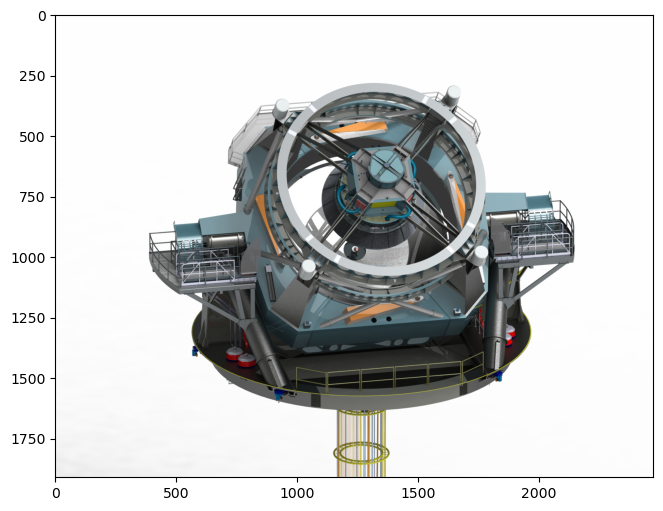

In [129]:
plt.imshow(image)

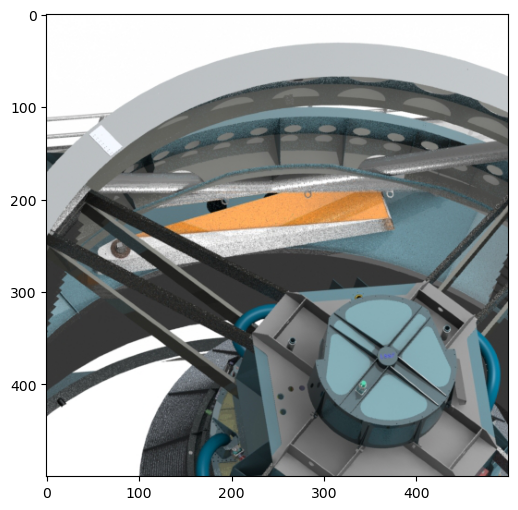

In [130]:
# We can zoom in by displaying a slice of the underlying array (a.k.a. cropping)
plt.imshow(image[250:750, 1000:1500])

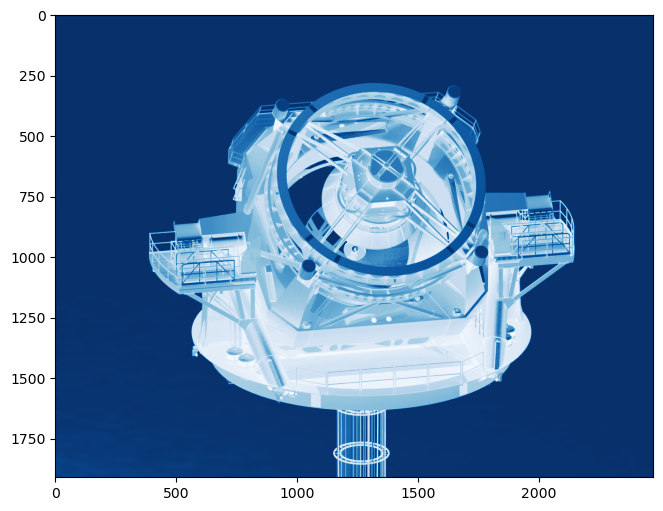

In [131]:
# Display a single color channel using a meaningful colormap
RED, GREEN, BLUE = 0, 1, 2
colormaps = {RED: 'Reds', GREEN: 'Greens', BLUE: 'Blues'}

channel = BLUE
plt.imshow(image[:, :, channel], cmap=colormaps[channel])

-------------
## Acknowledgements
<a id='Acknowledgements'></a>

These are the sources this notebook draws ideas, inspiration and sometimes material from. You are encouraged to consult them to deep further:

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jave VanderPlas (highly recommended book)
* Python Bootcamp organised by the [Berkeley Institute for Data Science (BIDS)](https://bids.berkeley.edu) in the Fall 2016: [videos](https://bids.berkeley.edu/news/python-boot-camp-fall-2016-training-videos-available-online) and [notebooks](https://github.com/profjsb/python-bootcamp)

If you are new to Python, the [HEP Software Foundation's Python Starter Kit](https://hsf-training.github.io/analysis-essentials/) may help you getting familiar with the tools used in a science experiment for analysing data.

The book, [Fluent Python](https://github.com/fluentpython) by Luciano Ramalho is an excellent source when you are more comfortable with Python.